In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler

In [3]:
data=pd.read_csv('/content/NSE-TATAGLOBAL.csv')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,27-07-2010,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,26-07-2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,23-07-2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,22-07-2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,21-07-2010,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [43]:
#sorting with date
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [6]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2004,2010-01-09,121.65,123.65,120.2,122.7,123.00,2274887,2781.63
1983,2010-01-10,121.30,124.00,121.3,123.6,123.50,711861,875.04
1962,2010-01-11,126.00,128.40,123.0,124.5,124.55,1621553,2044.44
1941,2010-01-12,113.50,116.00,113.0,114.5,114.75,628391,722.87
2026,2010-02-08,117.30,118.50,116.6,118.1,117.30,663593,779.85


In [7]:
df.reset_index(inplace=True)

In [8]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2004,2010-01-09,121.65,123.65,120.2,122.7,123.00,2274887,2781.63
1,1983,2010-01-10,121.30,124.00,121.3,123.6,123.50,711861,875.04
2,1962,2010-01-11,126.00,128.40,123.0,124.5,124.55,1621553,2044.44
3,1941,2010-01-12,113.50,116.00,113.0,114.5,114.75,628391,722.87
4,2026,2010-02-08,117.30,118.50,116.6,118.1,117.30,663593,779.85


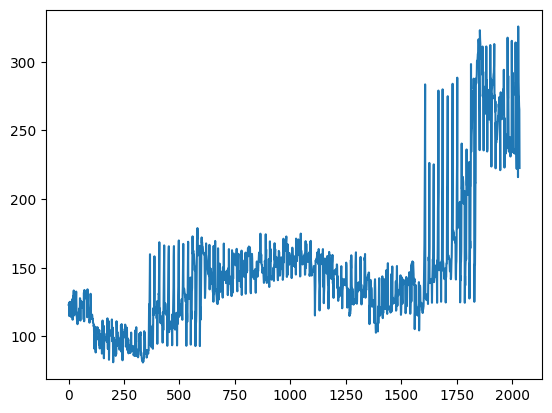

In [9]:
plt.plot(df['Close'])

In [10]:
df1=df['Close']

In [11]:
##LSTM are sensitive to the scale of the data, therefore applying MinMax Scaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.17177288],
       [0.17381536],
       [0.17810458],
       ...,
       [0.76245915],
       [0.75265523],
       [0.57883987]])

In [12]:
#Splitting Dataset into train and test data 
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(1424, 611)

In [14]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [17]:
print(X_test.shape), print(ytest.shape)

(510, 100)
(510,)


(None, None)

In [18]:
#reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [19]:
## Creating the stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 13s 321ms/step - loss: 0.0113 - val_loss: 0.0021
Epoch 2/60
19/19 [==============================] - 4s 218ms/step - loss: 0.0035 - val_loss: 0.0023
Epoch 3/60
19/19 [==============================] - 4s 196ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 4/60
19/19 [==============================] - 4s 222ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 5/60
19/19 [==============================] - 5s 251ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 6/60
19/19 [==============================] - 4s 197ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 7/60
19/19 [==============================] - 4s 208ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 8/60
19/19 [==============================] - 5s 252ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 9/60
19/19 [==============================] - 4s 211ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 10/60
19/19 [==============================] - 4s 207ms/step - loss: 0.0024 - val_loss: 0.002

In [22]:
## Lets do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

16/16 [==============================] - 1s 67ms/step


In [23]:
## Transform back to original form 
train_predict1=scaler.inverse_transform(train_predict)
test_predict2=scaler.inverse_transform(test_predict)

In [24]:
train_predict1

array([[118.34104],
       [118.95025],
       [118.36374],
       ...,
       [125.81072],
       [126.52018],
       [127.53411]], dtype=float32)

In [25]:
test_predict2

array([[127.41609 ],
       [130.9648  ],
       [132.6132  ],
       [133.01717 ],
       [133.92041 ],
       [134.80133 ],
       [135.51886 ],
       [135.77792 ],
       [135.36783 ],
       [134.51578 ],
       [133.58052 ],
       [133.19522 ],
       [132.75313 ],
       [132.7304  ],
       [133.13614 ],
       [132.8195  ],
       [132.26166 ],
       [129.7105  ],
       [126.13804 ],
       [122.9876  ],
       [121.50648 ],
       [123.03535 ],
       [127.83333 ],
       [131.19312 ],
       [135.26389 ],
       [139.60783 ],
       [142.78929 ],
       [144.62215 ],
       [145.48088 ],
       [145.30304 ],
       [144.55089 ],
       [143.74522 ],
       [142.757   ],
       [141.16066 ],
       [138.73462 ],
       [136.31325 ],
       [134.17348 ],
       [132.75638 ],
       [128.4693  ],
       [124.54828 ],
       [122.5938  ],
       [122.67283 ],
       [126.01252 ],
       [131.40097 ],
       [135.04785 ],
       [136.68813 ],
       [137.2163  ],
       [136.4

In [26]:
## Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.0425644303232082

In [27]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_train,train_predict))

0.0425644303232082

In [28]:
## Calculate RMSE performance metrics (ytest)
math.sqrt(mean_squared_error(ytest,test_predict))

0.16376637732609248

In [29]:
### Test Data RMSE (ytest)
math.sqrt(mean_squared_error(ytest,test_predict))

0.16376637732609248

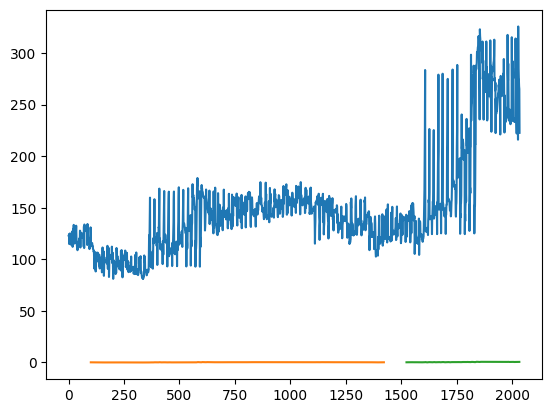

In [30]:
### PLotting
#Shift train prediction for plotting
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

#Shift test prediction for plotting
testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [31]:
len(test_data)

611

In [32]:
x_input=test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [33]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [34]:
temp_input

[0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7587826797385622,
 0.7892156862745097,
 0.7832924836601307,
 0.7549019607843137,
 0.7571486928104576,
 0.647671568627451,
 0.5723039215686275,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.8137254901960784,
 0.7677696078431371,
 0.8711192810457515,
 0.7604166666666667,
 0.6399101307189542,
 0.5800653594771241,
 0.7269199346405228,
 0.6629901960784313,
 0.6819852941176472,
 0.6441993464052288,
 0.6215277777777778,
 0.6439950980392156,
 0.6631944444444445,
 0.6754493464052289,
 0.6370506535947713,
 0.6460375816993464,
 0.6589052287581699,
 0.6587009803921569,
 0.6779003267973858,
 0.9667075163398695,
 0.8149509803921569,
 0.78615196078431

In [35]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        #print(x_input)
        yhat=model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

[0.5229804]
101
1 day input [0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.75878268
 0.78921569 0.78329248 0.75490196 0.75714869 0.64767157 0.57230392
 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242 0.73488562
 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922 0.74754902
 0.76960784 0.81372549 0.76776961 0.87111928 0.76041667 0.63991013
 0.58006536 0.72691993 0.6629902  0.68198529 0.64419935 0.62152778
 0.6439951  0.66319444 0.67544935 0.63705065 0.64603758 0.65890523
 0.65870098 0.67790033 0.96670752 0.81495098 0.78615196 0.85273693
 0.75980392 0.63480392 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.95731209 0.80596405 0.76552288
 0.80412582 0.86213235 0.79370915 0.63868464 0.625      0.63582516
 0.62949346 0.62888072 0.62765523 0.62234477 0.63378268 0.62622549
 0.62214052 0.62418301 0.95241013 0.79473039 0.83455882 0.79166667
 0.62336601 0.57618464 0.94914216 

In [36]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [37]:
import matplotlib.pyplot as plt

In [38]:
len(df1)

2035

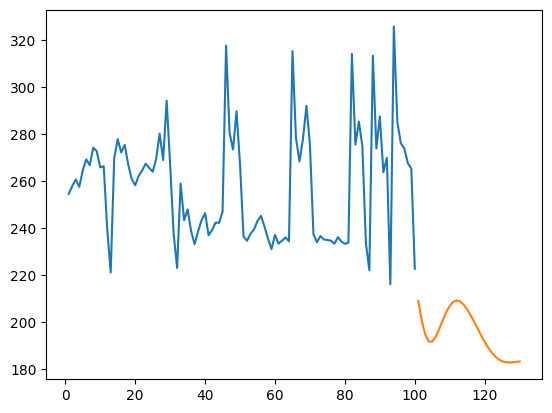

In [39]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

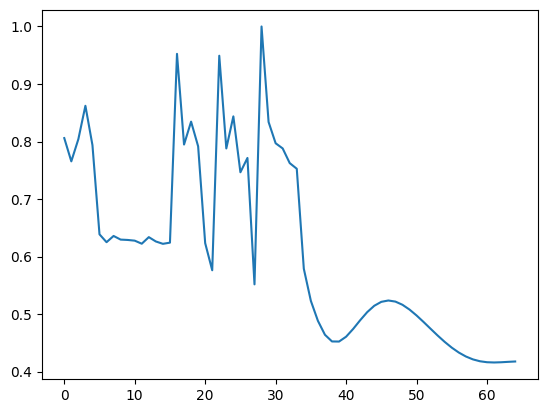

In [40]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])

In [41]:
df3=scaler.inverse_transform(df3).tolist()

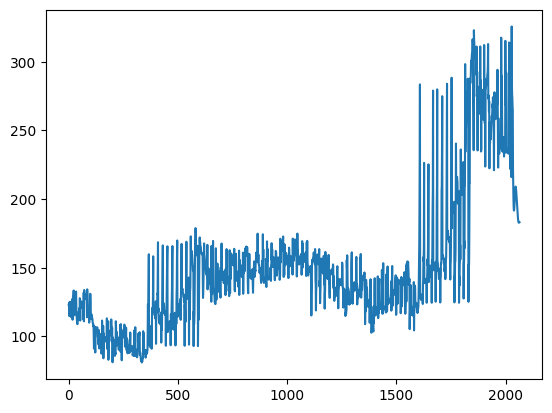

In [42]:
plt.plot(df3)